# More Qwerties!

In [87]:
# import libraries
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sys

# import my own libraries
sys.path.append('../myUtils')
import myGraph as myG
import text as myT

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Create Data

In [88]:
def createData(nPerClust, locations, labels=None, blur=1, plot=False) -> tuple[torch.tensor, torch.tensor, list]:
    ''' 
    nPerClust: number of points per cluster
    locations: list of locations of clusters, eg.: [[1,1],[5,1],...]
    labels: list of labels per cluster, eg.: [0,1,...] (default: [0,1,...])
    blur: standard deviation of gaussian noise (default: 1)
    
    returns: data, labels, clusters
    data: tensor of size (2n x 2) (2n points, 2 dimensions)
    labels: tensor of size (2n x 1) (2n points, 1 dimension)
    clusters: list of clusters, each cluster is a list of 2 lists (x and y coordinates)
    
    plot using:
    for i,cluster in enumerate(clusters):
        plt.scatter(cluster[0], cluster[1], label=i)
    
    '''
    def noise():
        return np.random.randn(nPerClust)*blur

    # generate data
    if labels is None:
        labels = range(len(locations))  # [0,1,...]
    
    data = []
    for i,loc in enumerate(locations):
        data.append([loc[0]+noise(), loc[1]+noise()])
        
    # labels (0 for a, 1 for b) (2n x 1)
    labels_np = np.vstack([np.ones((nPerClust,1))*label for label in labels])
    
    # concatanate into a matrix
    data_np = np.hstack(data).T
     
    # convert to a pytorch tensor
    data = torch.tensor(data_np).float()
    
    # data for plotting
    clusters = []
    for i,loc in enumerate(locations):
        clusters.append([data[np.where(labels_np==i)[0],0], data[np.where(labels_np==i)[0],1]])
        
    if plot:
        # figsize 5,5
        plt.figure(figsize=(5,5))
        for i,cluster in enumerate(clusters):
            plt.scatter(cluster[0], cluster[1], label=i)
        plt.legend()
        plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
        # set same scale for x and y axes
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data')
        plt.show()
        plt.close()
    
    return data, labels_np, clusters

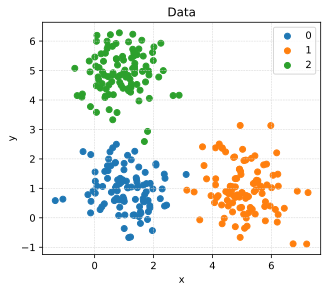

In [89]:
# define cluster locations:
locs = [[1,1],[5,1],[1,5]]
nPerClust = 100

# create data
data, labels_np, clusters = createData(nPerClust, locs, blur=0.8, plot=True)


In [90]:
# print a sample of data
print('data:') 
print(data[:5,:])

# print a sample of labels
print('labels:')
print(labels_np[:5,:])

data:
tensor([[-0.1373,  0.1664],
        [ 1.0273,  0.0973],
        [ 0.6961,  1.8625],
        [ 0.8268,  0.6085],
        [ 2.2295,  0.6502]])
labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [91]:
import seaborn as sns

# add the labels to data
data_df = pd.DataFrame(data)
data_df['label'] = labels_np

data

tensor([[-1.3733e-01,  1.6640e-01],
        [ 1.0273e+00,  9.7300e-02],
        [ 6.9611e-01,  1.8625e+00],
        [ 8.2677e-01,  6.0850e-01],
        [ 2.2295e+00,  6.5017e-01],
        [ 2.4636e-01,  3.7545e-01],
        [ 9.3916e-01,  6.0002e-01],
        [ 1.3512e+00,  8.4195e-02],
        [ 1.2199e+00, -6.5212e-01],
        [-3.9345e-01,  2.2480e+00],
        [ 2.4434e+00,  4.3174e-01],
        [ 1.0785e+00,  1.2439e+00],
        [ 1.3421e+00,  9.8056e-02],
        [ 1.5084e+00,  3.9334e-02],
        [ 2.3558e-02,  1.2417e+00],
        [ 1.6472e+00,  6.5096e-01],
        [ 1.1181e+00,  2.1220e+00],
        [ 1.8906e+00,  1.1689e+00],
        [ 9.6472e-01,  7.0287e-01],
        [-1.0781e+00,  6.3322e-01],
        [ 4.7537e-01,  1.9946e+00],
        [ 7.5001e-01,  9.5035e-01],
        [ 1.2430e+00,  1.9696e+00],
        [ 7.6845e-01,  9.1843e-01],
        [ 1.5265e+00,  3.7700e-01],
        [ 3.2891e-01,  4.7564e-01],
        [ 1.2451e+00,  1.0458e+00],
        [ 2.2099e-02,  8.363

c:\Python\UDEMY - DeepUnderstandingOfDeepLearning\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python\UDEMY - DeepUnderstandingOfDeepLearning\.venv\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


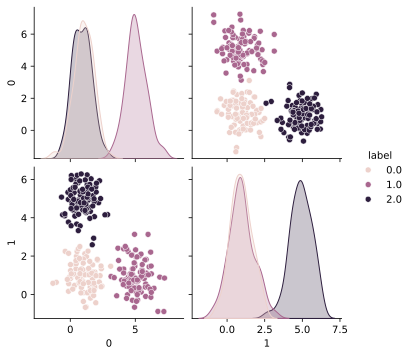

In [92]:
# some plots to show the data
sns.pairplot(data_df, hue='label')
plt.show()


In [93]:
labels = torch.tensor( labels_np ).squeeze().long()  # the labels are the last column
labels[:5]

tensor([0, 0, 0, 0, 0])

In [94]:
data[:5]

tensor([[-0.1373,  0.1664],
        [ 1.0273,  0.0973],
        [ 0.6961,  1.8625],
        [ 0.8268,  0.6085],
        [ 2.2295,  0.6502]])

# Create the ANN model

In [95]:
import torch.nn as nn

# model architecture
ANNQwerties = nn.Sequential(
    nn.Linear(2,8),   # input layer, 2 inputs
    nn.ReLU(),         # activation
    nn.Linear(8,64),   # input layer, 2 inputs
    nn.ReLU(),         # activation
    nn.Linear(64,8),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(8,3),   # output layer, 3 outputs (the model will output the probability of each class)
)

# loss function
lossfun = nn.CrossEntropyLoss() # loss function, normalizes by N by default

# optimizer
optimizer = torch.optim.SGD(ANNQwerties.parameters(), lr=.01)

# Train the model

In [96]:
from typing import final


numepochs = 3000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []
ongoingAcc_partials = []
ongoingAcc_0 = []
ongoingAcc_1 = []
ongoingAcc_2 = []

# loop over epochs
for epochi in range(numepochs):

    # forward pass
    yHat = ANNQwerties(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    # example: 
    # yHat =  [ [.1,.2,.7],
    #           [.8,.1,.1],
    #           [.3,.4,.3],
    #               ...  
    #                     ]             # the output of the model (the probability of each class)
    # 
    arg_max = torch.argmax(yHat,axis=1)
    # argmax(yHat,axis=1) = [ 2,
    #                         0,
    #                         1, 
    #                        ... ]      # the index of the highest value in each row
    # supose labels = [ 2,
    #                   1,
    #                   1,
    #                  ... ]            # correct labels
    # Then:
    # matches = [ True, 
    #             False,
    #             True,
    #             ... ]                 # True if the prediction is correct, False otherwise
    matches = (arg_max == labels) # booleans (false/true)

    matchesNumeric = matches.float()              # convert to numbers (0/1)
    # example:
    # matchesNumeric = [ 1,
    #                    0,
    #                    1,
    #                   ... ]                     # 1 if correct, 0 if incorrect
    accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
    # example:
    # accuracyPct = 66.66666...                  # 2/3 correct
    
    ongoingAcc.append( accuracyPct )              # add to list of accuracies

    ongoingAcc_partials = [ongoingAcc_0, ongoingAcc_1, ongoingAcc_2]

    for i in range(3):
        arg_max_i = arg_max == i
        labels_i = labels == i
        matches_i = (arg_max_i == labels_i).float()
        accuracyPct_i = 100*torch.mean(matches_i)
        ongoingAcc_partials[i].append(accuracyPct_i)

    if epochi % 100 == 0:
        print(f'epoch {epochi}... ')



# final forward pass
final_yHat = ANNQwerties(data)
  
final_matches = torch.argmax(final_yHat,axis=1)
final_accuracyPct = 100*torch.mean((final_matches == labels).float())


epoch 0... 
epoch 100... 
epoch 200... 
epoch 300... 
epoch 400... 
epoch 500... 
epoch 600... 
epoch 700... 
epoch 800... 
epoch 900... 
epoch 1000... 
epoch 1100... 
epoch 1200... 
epoch 1300... 
epoch 1400... 
epoch 1500... 
epoch 1600... 
epoch 1700... 
epoch 1800... 
epoch 1900... 
epoch 2000... 
epoch 2100... 
epoch 2200... 
epoch 2300... 
epoch 2400... 
epoch 2500... 
epoch 2600... 
epoch 2700... 
epoch 2800... 
epoch 2900... 


In [97]:
torch.argmax(yHat,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

# Visualize the results

Final accuracy: 99.3333%


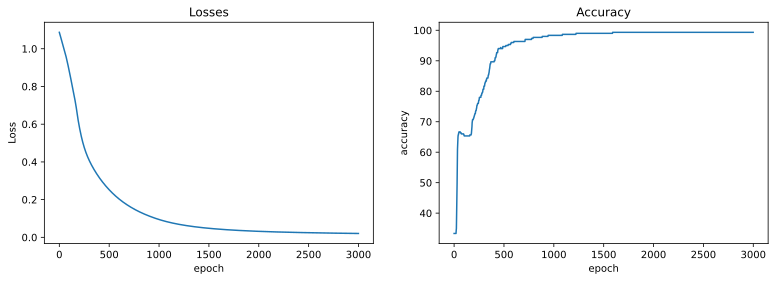

In [98]:
# report accuracy
print('Final accuracy: %g%%' % final_accuracyPct)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

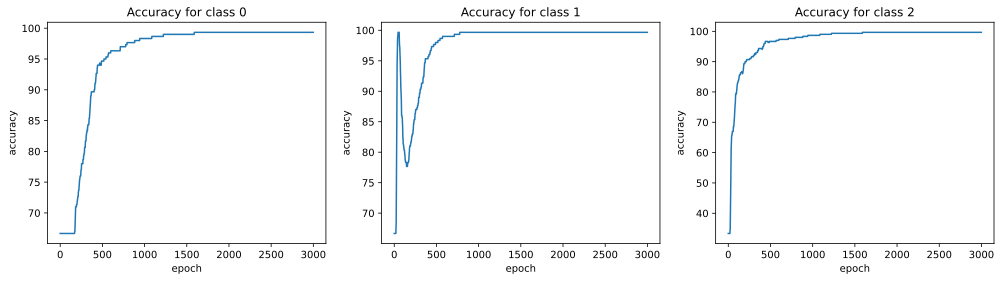

In [99]:
# Plot ongoing accuracy for each class
fig,ax = plt.subplots(1,3,figsize=(17,4))

ax[0].plot(ongoingAcc_partials[0])
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_title('Accuracy for class 0')

ax[1].plot(ongoingAcc_partials[1])
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy for class 1')

ax[2].plot(ongoingAcc_partials[2])
ax[2].set_ylabel('accuracy')
ax[2].set_xlabel('epoch')
ax[2].set_title('Accuracy for class 2')
plt.show()

In [100]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
# torch.sum(sm(yHat),axis=1)

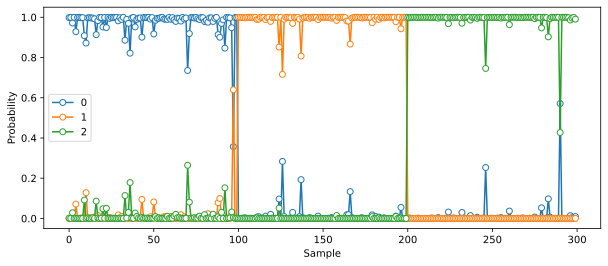

In [101]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'o-',markerfacecolor='w')
plt.xlabel('Sample')
plt.ylabel('Probability')
plt.legend(['0','1','2'])
plt.show()

# try it again without the softmax!

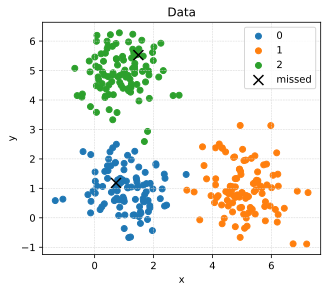

In [102]:
# plot the model outputs (label vs x, y) and missclasifications

predictions = ANNQwerties(tdata)

plt.figure(figsize=(5,5))
for i,cluster in enumerate(clusters):
    plt.scatter(cluster[0], cluster[1], label=i)
    
failed = np.where(final_matches != labels)[0]
plt.scatter(tdata[failed,0], tdata[failed,1], marker='x', color='k', s=100, label='missed')

plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()



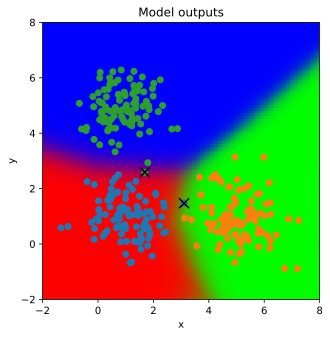

In [103]:
# create a heatmap of the model outputs
 
# create a grid of x and y values
x = np.linspace(-2,8,100)
y = np.linspace(-2,8,100)
xx,yy = np.meshgrid(x,y)
 
# convert to a tensor
grid = torch.tensor( np.vstack([xx.flatten(),yy.flatten()]).T ).float()
 
# get the model outputs
with torch.no_grad():
    predictions = ANNQwerties(grid)
    
# convert to softmax
sm = nn.Softmax(1)
predictions = sm(predictions)
 
# reshape the predictions
predictions = predictions.reshape(100,100,3)
 
# plot the heatmap
plt.figure(figsize=(5,5))
plt.imshow(predictions, extent=[-2,8,-2,8], origin='lower')

# add the original data and the missclassifications
for i,cluster in enumerate(clusters):
    plt.scatter(cluster[0], cluster[1], label=i)
     
failed = np.where(final_matches != labels)[0]
plt.scatter(data[failed,0], data[failed,1], marker='x', color='k', s=100, label='missed')
 

plt.xlabel('x')
plt.ylabel('y')
plt.title('Model outputs')
plt.show()
